In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../results/results_07-07.csv")
df_dtwd = pd.read_csv("../metadata/uea_benchmark.csv")
df_properties = pd.read_csv("../metadata/datasets_properties.csv")

In [5]:
remove_datasets = [
    "DuckDuckGeese",
    "InsectWingbeat",
    "PEMS-SF",
]

df["convolution_algorithm"] = df["convolution_algorithm"].fillna("Sem Convolução")
df["representation"] = df["representation"].fillna("Sem Representação")
df["operation"] = df["operation"].fillna("Sem Operação de Fusão")

df = df[~(df["dataset"].isin(remove_datasets))]

df = pd.merge(df, df_properties, on='dataset', how='inner')

df["operation"] = df["operation"].replace("sum", "Soma")
df["operation"] = df["operation"].replace("subtraction", "Subtração")
df["operation"] = df["operation"].replace("dot_product", "Produto Matricial")
df["operation"] = df["operation"].replace("element_wise", "Produto de Hadamard")

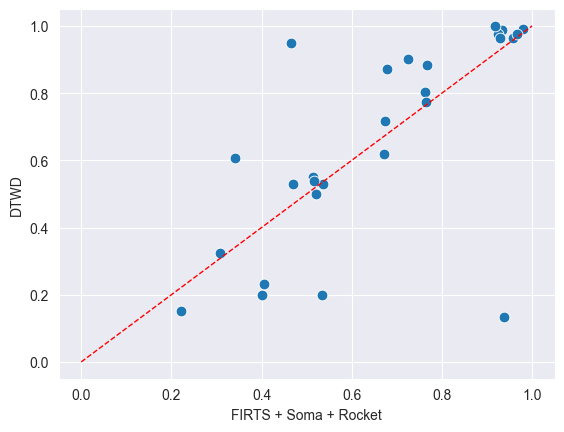

In [6]:
df_firts_sum_rocket = df[
    (df["convolution_algorithm"] == "Rocket") &
    (df["representation"] == "FIRTS") &
    (df["operation"] == "Soma")
]

df_firts_sum_rocket = df_firts_sum_rocket.rename(columns={"accuracy": "FIRTS + Soma + Rocket"})

second_df = pd.DataFrame(df_dtwd[["dataset", "unnormalised_dtwd"]])
second_df = second_df.rename(columns={"unnormalised_dtwd": "DTWD"})

final_df = pd.merge(df_firts_sum_rocket, second_df, on="dataset")
final_df["r"] = final_df["FIRTS + Soma + Rocket"] - final_df["DTWD"]

plt.plot([0, 1], [0, 1], 'r--', linewidth=1)

sns.scatterplot(data=final_df, x="FIRTS + Soma + Rocket", y="DTWD", s=60)

plt.show()

In [7]:
final_df

,dataset,representation,operation,FIRTS + Soma + Rocket,convolution_algorithm,classification_algorithm,train_cases,test_cases,dimensions,length,classes,category,DTWD,r
0,ArticularyWordRecognition,FIRTS,Soma,0.933333,Rocket,Ridge,275,300,9,144,25,Motion Classification,0.987,-0.053667
1,AtrialFibrillation,FIRTS,Soma,0.400000,Rocket,Ridge,15,15,2,640,3,ECG Classification,0.200,0.200000
2,BasicMotions,FIRTS,Soma,0.925000,Rocket,Ridge,40,40,6,100,4,Human Activity Recognition,0.975,-0.050000
3,CharacterTrajectories,FIRTS,Soma,0.979109,Rocket,Ridge,1422,1436,3,182,20,Motion Classification,0.990,-0.010891
4,Cricket,FIRTS,Soma,0.916667,Rocket,Ridge,108,72,6,1197,12,Human Activity Recognition,1.000,-0.083333
5,EigenWorms,FIRTS,Soma,0.671756,Rocket,Ridge,128,131,6,17984,5,Motion Classification,0.618,0.053756
6,Epilepsy,FIRTS,Soma,0.956522,Rocket,Ridge,137,138,3,206,4,Human Activity Recognition,0.964,-0.007478
7,EthanolConcentration,FIRTS,Soma,0.307985,Rocket,Ridge,261,263,3,1751,4,Other Problems,0.323,-0.015015
8,ERing,FIRTS,Soma,0.937037,Rocket,Ridge,30,30,4,65,6,Human Activity Recognition,0.133,0.804037
9,FaceDetection,FIRTS,Soma,0.536890,Rocket,Ridge,5890,3524,144,62,2,EEG/MEG Classification,0.529,0.007890


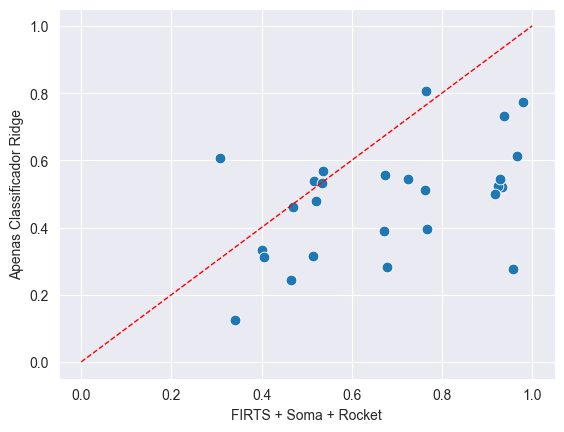

In [8]:
df_ridge = df[
    (df["convolution_algorithm"] == "Sem Convolução") &
    (df["representation"] == "Sem Representação") &
    (df["operation"] == "Sem Operação de Fusão")
]

df_ridge_sliced = pd.DataFrame(df_ridge[["dataset", "accuracy"]])
df_ridge_sliced = df_ridge_sliced.rename(columns={"accuracy": "Apenas Classificador Ridge"})


df_ridge_merged = pd.merge(df_firts_sum_rocket, df_ridge_sliced, on="dataset")
df_ridge_merged["r"] = df_ridge_merged["FIRTS + Soma + Rocket"] - df_ridge_merged["Apenas Classificador Ridge"]

plt.plot([0, 1], [0, 1], 'r--', linewidth=1)

sns.scatterplot(data=df_ridge_merged, x="FIRTS + Soma + Rocket", y="Apenas Classificador Ridge", s=60)

plt.show()

In [9]:
df_ridge_merged[["dataset", "FIRTS + Soma + Rocket", "Apenas Classificador Ridge", "r"]]

,dataset,FIRTS + Soma + Rocket,Apenas Classificador Ridge,r
0,ArticularyWordRecognition,0.933333,0.520000,0.413333
1,AtrialFibrillation,0.400000,0.333333,0.066667
2,BasicMotions,0.925000,0.525000,0.400000
3,CharacterTrajectories,0.979109,0.772284,0.206825
4,Cricket,0.916667,0.500000,0.416667
5,EigenWorms,0.671756,0.389313,0.282443
6,Epilepsy,0.956522,0.275362,0.681159
7,EthanolConcentration,0.307985,0.608365,-0.300380
8,ERing,0.937037,0.733333,0.203704
9,FaceDetection,0.536890,0.567821,-0.030931
